<a href="https://colab.research.google.com/github/m365i/hw-py-deep-learning/blob/main/OneNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following guide in https://github.com/PeizeSun/OneNet

Using existing trained model "model_onenet_r50dcn.pth"  
  
taken from https://drive.google.com/drive/folders/1LnHMj7pkJhODeZTNHW-UcUZxybKbQmTB  

Prerequirements 

In [ ]:
! pip install torch==1.8.2+cu111 torchvision==0.9.2+cu111 torchaudio==0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
! pip install setuptools opencv-python pycocotools>=2.0.1 pyyaml==5.1

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:15tcmalloc: large alloc 1147494400 bytes == 0x55a20dbcc000 @  0x7fd142de6615 0x55a1d3e3317c 0x55a1d3f1347a 0x55a1d3e35f9d 0x55a1d3f27d4d 0x55a1d3ea9ec8 0x55a1d3ea4a2e 0x55a1d3e3788a 0x55a1d3ea9d30 0x55a1d3ea4a2e 0x55a1d3e3788a 0x55a1d3ea6719 0x55a1d3f28b76 0x55a1d3ea5d95 0x55a1d3f28b76 0x55a1d3ea5d95 0x55a1d3f28b76 0x55a1d3ea5d95 0x55a1d3e37ce9 0x55a1d3e7b579 0x55a1d3e36902 0x55a1d3ea9c4d 0x55a1d3ea4a2e 0x55a1d3e3788a 0x55a1d3ea6719 0x55a1d3ea4a2e 0x55a1d3e3788a 0x55a1d3ea58f6 0x55a1d3e377aa 0x55a1d3ea5b4f 0x55a1d3ea4a2e
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:12:07tcmalloc: large alloc 1434370048 bytes == 0x55a252222000 @  0x7fd142de6615 0x55a1d3e3317c 0x55a1d3f1347a 0x55a1d3e35f9d 0x55a1d3f27d4d 0x55a1d3ea9ec8 0x55a1d3ea4a2e 0x55a1d3e3788a 0x55a1d3ea9d30 0x55a1d3ea4a2e 0x55a1d3e3788a 0x55a1d3ea6719 0x55a1d3f28b76 0x55a1d

In [ ]:
! git clone https://github.com/PeizeSun/OneNet.git
%cd OneNet
! python setup.py build develop

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (677/677), done.
remote: Compressing objects: 100% (550/550), done.
remote: Total 677 (delta 184), reused 557 (delta 117), pack-reused 0
Receiving objects: 100% (677/677), 1.53 MiB | 29.50 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/OneNet
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
creating build/lib.linux-x86_64-3.7/detectron2
copying detectron2/__init__.py -> build/lib.linux-x86_64-3.7/detectron2
creating build/lib.linux-x86_64-3.7/detectron2/modeling
copying detectron2/modeling/test_time_augmentation.py -> build/lib.linux-x86_64-3.7/detectron2/modeling
copying detectron2/modeling/poolers.py -> build/lib.linux-x86_64-3.7/detectron2/modeling
copying detectron2/modeling/__init__.py -> build/lib.linux-x86_64-3.7/detectron2/modeling
copying detectron2/modeling/box_regression.py -> build/lib.linux-x86_64-3.7/detectron2/modeling
copying de

Downlaod coco dataset  
taken from https://cocodataset.org/#download  
download only evaluation dataset if you have existing model  

In [ ]:
! wget -P /content/coco -nc http://images.cocodataset.org/zips/val2017.zip
! unzip -q -n /content/coco/val2017.zip -d /content/coco

--2022-04-23 17:35:27--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.142.236
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.142.236|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘/content/coco/val2017.zip’

val2017.zip         100%[===================>] 777.80M  53.7MB/s    in 16s     

2022-04-23 17:35:43 (48.8 MB/s) - ‘/content/coco/val2017.zip’ saved [815585330/815585330]



In [ ]:
%%script false --no-raise-error

! mkdir -p /content/coco

! wget -P /content/coco -nc http://images.cocodataset.org/zips/train2017.zip
! unzip -q -n /content/coco/train2017.zip -d /content/coco
! rm /content/coco/train2017.zip

! wget -P /content/coco -nc http://images.cocodataset.org/annotations/annotations_trainval2017.zip
! unzip -q -n /content/coco/annotations_trainval2017.zip -d /content/coco
! rm /content/coco/annotations_trainval2017.zip

Install and build libs

In [ ]:
! git clone https://github.com/PeizeSun/OneNet.git

Cloning into 'OneNet'...
remote: Enumerating objects: 677, done.
remote: Counting objects: 100% (677/677), done.
remote: Compressing objects: 100% (550/550), done.
remote: Total 677 (delta 184), reused 557 (delta 117), pack-reused 0
Receiving objects: 100% (677/677), 1.53 MiB | 23.69 MiB/s, done.
Resolving deltas: 100% (184/184), done.


In [ ]:
% cd /content/OneNet
! python setup.py build develop

/content/OneNet
running build
running build_py
running build_ext
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:369: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running develop
running egg_info
writing detectron2.egg-info/PKG-INFO
writing dependency_links to detectron2.egg-info/dependency_links.txt
writing requirements to detectron2.egg-info/requires.txt
writing top-level names to detectron2.egg-info/top_level.txt
adding license file 'LICENSE'
writing manifest file 'detectron2.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.7/detectron2/_C.cpython-37m-x86_64-linux-gnu.so -> detectron2
Creating /usr/local/lib/python3.7/dist-packages/detectron2.egg-link (link to .)
detectron2 0.3 is already the active version in easy-install.pth

Installed /content/OneNet
Processing dependencies for dete

Evaluate

In [ ]:
%%script false --no-raise-error

! python projects/OneNet/train_net.py --num-gpus 1 \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
      --eval-only MODEL.WEIGHTS /content/drive/MyDrive/model_onenet_r50dcn.pth

Visualize  
testing on some input images taken from coco dataset validation 2017  

In [ ]:
! mkdir -p /content/coco/val2017_res
% cd /content/OneNet/
! ls
! python demo/demo.py \
    --config-file projects/OneNet/configs/onenet.res50.dcn.yaml \
    --input /content/coco/val2017/000000000*.jpg \
    --output /content/coco/val2017_res \
    --confidence-threshold 0.4 \
    --opts MODEL.WEIGHTS \
    /content/drive/MyDrive/model_onenet_r50dcn.pth

/content/OneNet
build	     demo_d2		  docs		      OneNet	    setup.cfg
colormap.py  detectron2		  GETTING_STARTED.md  onenet.jpeg   setup.py
configs      detectron2.egg-info  INSTALL.md	      projects	    tests
datasets     dev		  LICENSE	      README_d2.md  tools
demo	     docker		  MODEL_ZOO.md	      README.md
[04/23 17:35:55 detectron2]: Arguments: Namespace(confidence_threshold=0.4, config_file='projects/OneNet/configs/onenet.res50.dcn.yaml', input=['/content/coco/val2017/000000000139.jpg', '/content/coco/val2017/000000000285.jpg', '/content/coco/val2017/000000000632.jpg', '/content/coco/val2017/000000000724.jpg', '/content/coco/val2017/000000000776.jpg', '/content/coco/val2017/000000000785.jpg', '/content/coco/val2017/000000000802.jpg', '/content/coco/val2017/000000000872.jpg', '/content/coco/val2017/000000000885.jpg'], opts=['MODEL.WEIGHTS', '/content/drive/MyDrive/model_onenet_r50dcn.pth'], output='/content/coco/val2017_res', video_input=None, webcam=False)
[04/23 17:36:01 fvcor

Found 9 results


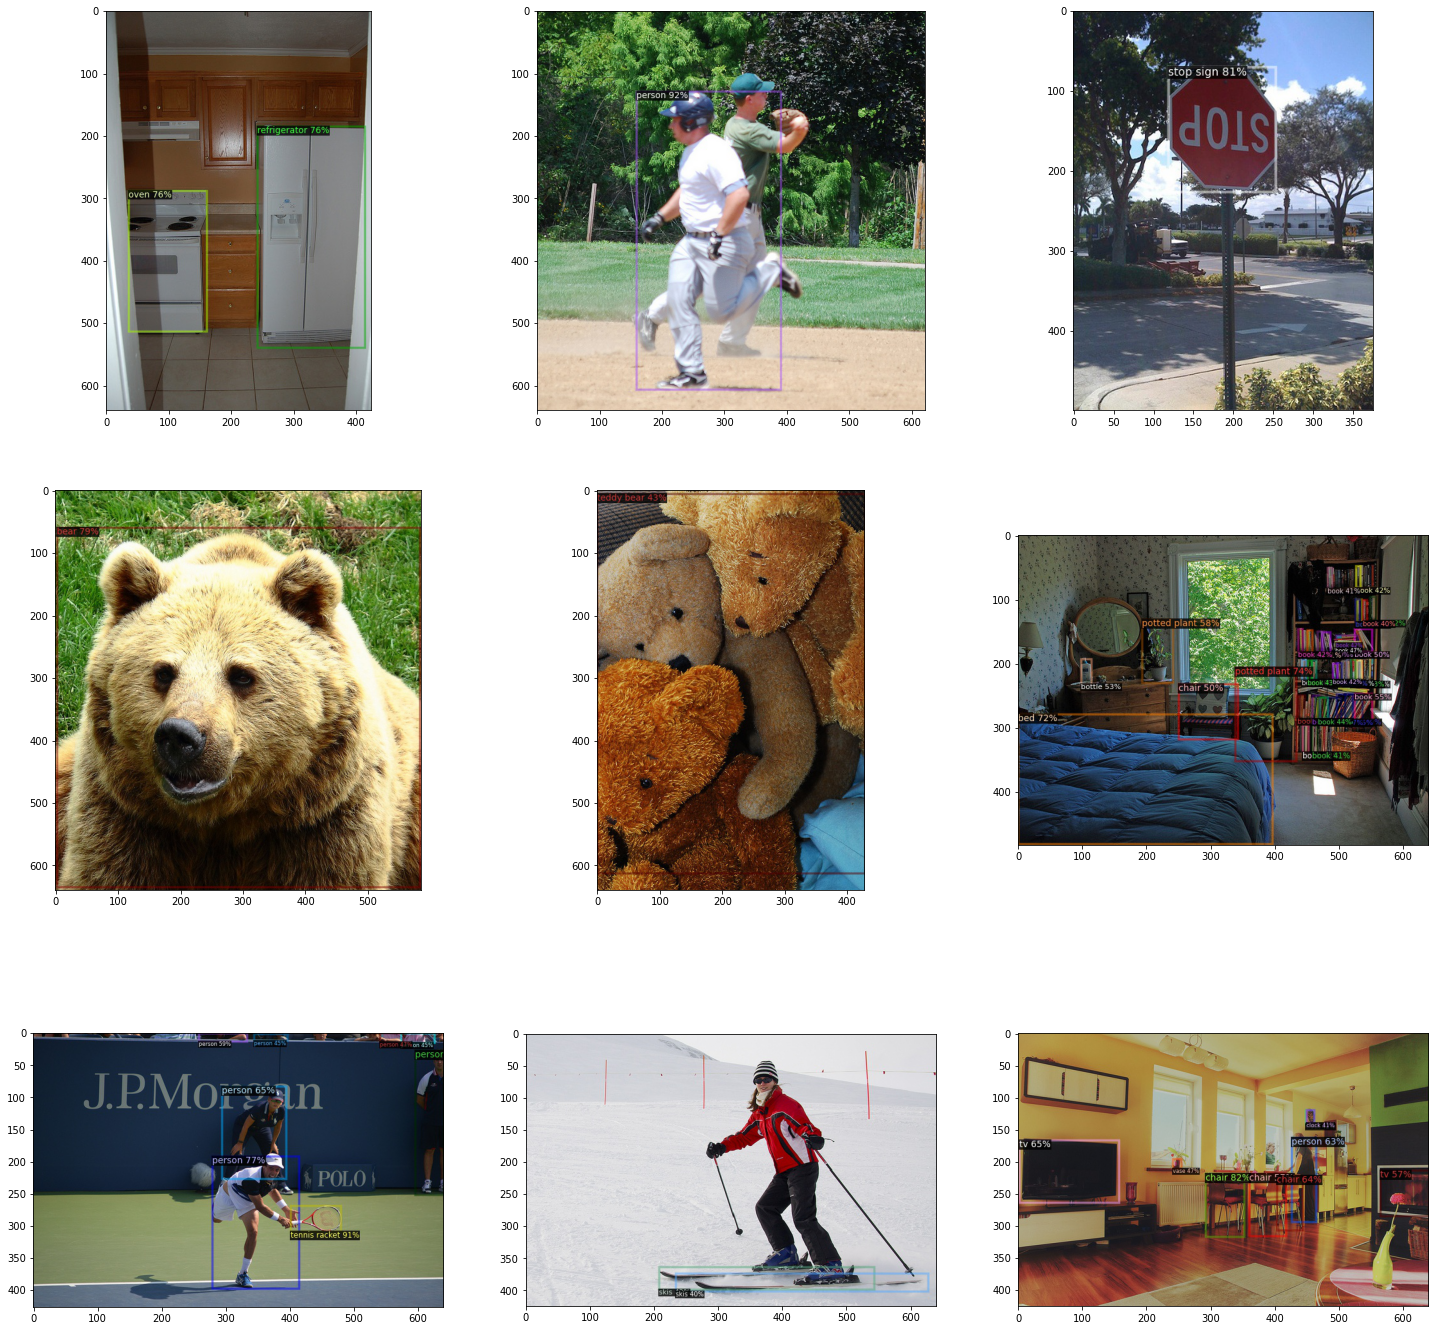

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import glob

images = glob.glob("/content/coco/val2017_res/00000000*.jpg")
n = len(images)
n = min(20, n)
print("Found %s results" % n)
cols = 3
rows = n//cols
if rows == 0:
  print("No results found!")
else:
  _, axs = plt.subplots(rows, cols, figsize=(25, 25))
  axs = axs.flatten()
  for img, ax in zip(images[:rows*cols], axs):
    img = plt.imread(img)
    ax.imshow(img)
  plt.show()